In [1]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [37]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [38]:
key_par = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

## EDA

In [39]:
data = df[key_par]
data

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [40]:
data['fuel_efficiency_mpg'].describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

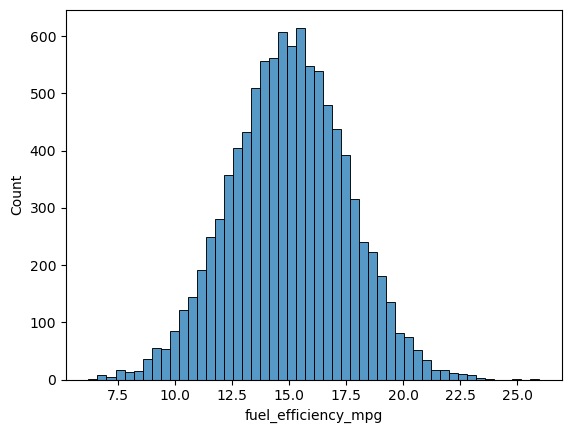

In [42]:
sns.histplot(data.fuel_efficiency_mpg, bins=50)
plt.show()

### No long tail

## question 1
### There's one column with missing values. What is it?
#### 'engine_displacement' 'horsepower' 'vehicle_weight' 'model_year'

In [43]:
data[['engine_displacement','horsepower','vehicle_weight','model_year']].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

In [44]:
print('hrsepower have 708 rows missing')

hrsepower have 708 rows missing


In [45]:
print('the median for horsepower',data['horsepower'].median())

the median for horsepower 149.0


In [46]:
n = len(data)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [47]:
n_train = int(0.6*n)
n_val = int(0.2*n)
n_test = int(0.2*n)

In [51]:
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

y_train = data_train.fuel_efficiency_mpg.values
y_val = data_val.fuel_efficiency_mpg.values
y_test = data_test.fuel_efficiency_mpg.values

del data_train['fuel_efficiency_mpg']
del data_val['fuel_efficiency_mpg']
del data_test['fuel_efficiency_mpg']



In [52]:
print('Question 3')

Question 3


In [53]:
print('medthod 1 using 0 to fill missing value')

medthod 1 using 0 to fill missing value


In [54]:
data_train

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006
...,...,...,...,...
8387,160,111.0,3038.134712,2002
7331,160,157.0,2877.624938,2006
1696,260,139.0,2606.972984,2009
5685,280,132.0,4004.214323,2014


In [55]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 16.96405425,
       10.05909406, 17.59323665])

In [71]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [72]:
X_train = data_train.fillna(0).values
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

In [73]:
w0

np.float64(28.810749329447)

In [74]:
w

array([ 9.88022381e-05,  3.54195814e-03, -5.01316573e-03,  3.51135284e-04])

In [75]:
mean = data_train['horsepower'].mean()

In [76]:
X_train_mean = data_train.fillna(mean).values

In [77]:
w0_mean,w_mean = train_linear_regression(X_train_mean,y_train)
y_pred_mean = w0_mean + X_train.dot(w_mean)

In [78]:
w0_mean

np.float64(28.90711061673742)

In [79]:
w_mean

array([ 0.00012034,  0.01030286, -0.00500997, -0.00022574])

In [102]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [82]:
y_pred_val = w0+data_val.dot(w)

In [84]:
y_pred_val_mean = w0_mean+data_val.dot(w_mean)

In [86]:
val_rmse = rmse(y_val,y_pred_val)
val_rmse_mean = rmse(y_val,y_pred_val_mean)

In [91]:
round(val_rmse,2)

np.float64(0.5)

In [92]:
round(val_rmse_mean,2)

np.float64(0.45)

In [93]:
def train_linear_regression_reg(X,y,r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [97]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0,w = train_linear_regression_reg(X_train,y_train,r = r)
    y_pred = w0+data_val.dot(w)
    score = rmse(y_val,y_pred)
    print(r,round(score,3))

0 0.497
0.01 0.496
0.1 0.498
1 0.502
5 0.503
10 0.503
100 0.503


In [103]:

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_collect = {}
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    data_fill_0 = data.fillna(0)
    data_train = data_fill_0.iloc[idx[:n_train]]
    data_val = data_fill_0.iloc[idx[n_train:n_train+n_val]]
    data_test = data_fill_0.iloc[idx[n_train+n_val:]]

    y_train = data_train.fuel_efficiency_mpg.values
    y_val = data_val.fuel_efficiency_mpg.values
    y_test = data_test.fuel_efficiency_mpg.values

    del data_train['fuel_efficiency_mpg']
    del data_val['fuel_efficiency_mpg']
    del data_test['fuel_efficiency_mpg']
    X_train = data_train.values
    w0,w = train_linear_regression(X_train,y_train)
    y_pred = w0 +data_val.dot(w)
    rmse_collect[seed] = rmse(y_val,y_pred)

{0: np.float64(0.5210993169601764),
 1: np.float64(0.5218422383656937),
 2: np.float64(0.5230384520042021),
 3: np.float64(0.5161215334520273),
 4: np.float64(0.5111869530280668),
 5: np.float64(0.5286833855544149),
 6: np.float64(0.532241891856728),
 7: np.float64(0.5095258233932749),
 8: np.float64(0.5149083792268891),
 9: np.float64(0.5131330922627657)}

In [115]:
round(np.std(np.array(list(rmse_collect.values()))),3)

np.float64(0.007)

In [116]:
print('question6')

question6


In [117]:
seed = 9
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)
data_fill_0 = data.fillna(0)
data_train = data_fill_0.iloc[idx[:n_train]]
data_val = data_fill_0.iloc[idx[n_train:n_train+n_val]]
data_test = data_fill_0.iloc[idx[n_train+n_val:]]
y_train = data_train.fuel_efficiency_mpg.values
y_val = data_val.fuel_efficiency_mpg.values
y_test = data_test.fuel_efficiency_mpg.values
del data_train['fuel_efficiency_mpg']
del data_val['fuel_efficiency_mpg']
del data_test['fuel_efficiency_mpg']

In [119]:
df_full_train = pd.concat([data_train, data_val])
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(df_full_train, y_full_train, r=0.001)
y_pred = w0+data_test.dot(w)
rmse(y_test,y_pred)

np.float64(0.515504336928875)